In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [88]:
#load the orginal data set
original_df = pd.read_csv("Citrone_Performance_overview_id.csv")
original_df.head()

,S/N,Name,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,0/5,NaN,0,0.0,No
1,2,id_2,5-May,NaN,70,56.0,Yes
2,3,id_3,5-Feb,NaN,80,64.0,Yes
3,4,id_4,5-May,NaN,100,80.0,Yes
4,5,id_5,5-Jun,NaN,80,64.0,Yes


In [89]:
original_df['Intermediate class Eligibility'] = original_df['Intermediate class Eligibility'].map({'Yes': 1, 'No': 0})

In [122]:
# correlation heatmap of the data set
original_df.corr()

,S/N,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
S/N,1.000000,NaN,-0.483111,-0.483111,-0.512423
Quiz Summary,NaN,NaN,NaN,NaN,NaN
Assignment Summary,-0.483111,NaN,1.000000,1.000000,0.984561
Grade Point Average,-0.483111,NaN,1.000000,1.000000,0.984561
Intermediate class Eligibility,-0.512423,NaN,0.984561,0.984561,1.000000


In [123]:
# Load a mock data set with 1060 rows
df = pd.read_csv("CITRONE_MOCK_DATA.csv")

In [124]:
df.head()

,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,5-May,False,24,73.1,TRUE
1,5-Jul,False,65,78.5,FALSE
2,5-May,False,71,32.7,FALSE
3,5-Mar,True,7,52.2,FALSE
4,5-Apr,False,51,38.5,FALSE


In [125]:
#modify the columns
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Lesson_Summary', 'Quiz_Summary', 'Assignment_Summary',
       'Grade_Point_Average', 'Intermediate_class_Eligibility'],
      dtype='object')

In [126]:
# Remove two columns name 'Lesson_Summary', 'Quiz_Summary'
df.drop(['Lesson_Summary', 'Quiz_Summary'], axis=1, inplace=True)
df.head()

,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
0,24,73.1,TRUE
1,65,78.5,FALSE
2,71,32.7,FALSE
3,7,52.2,FALSE
4,51,38.5,FALSE


In [127]:
df.Intermediate_class_Eligibility.value_counts()

FALSE    516
TRUE     484
Yes       42
No        18
Name: Intermediate_class_Eligibility, dtype: int64

In [128]:
#check for null values in the data
df.isnull().sum()

Assignment_Summary                0
Grade_Point_Average               0
Intermediate_class_Eligibility    0
dtype: int64

### EDA

In [129]:
#change (Yes/No and TRUE/FALSE) to 1/0
df['Intermediate_class_Eligibility'] = df['Intermediate_class_Eligibility'].map({'Yes': 1, 'No': 0, 'TRUE': 1, 'FALSE': 0})

In [130]:
df.head()

,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
0,24,73.1,1
1,65,78.5,0
2,71,32.7,0
3,7,52.2,0
4,51,38.5,0


In [131]:
df.corr()

,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
Assignment_Summary,1.000000,0.115859,0.033397
Grade_Point_Average,0.115859,1.000000,0.122992
Intermediate_class_Eligibility,0.033397,0.122992,1.000000


There is a very weak correlation between Intermediate_class_Eligibility and Grade_Point_Average & Assignment_Summary

In [132]:
#Now, we define a function to adjust the mock data to mimick the original data 
#And ensure no biaseness between eligibilty status and grade point

def adjust_grade(col):
    if col >= 50:
        return 1
    else:
        return 0

In [133]:
# Adjusting Intermediate_class_Eligibility to conform with Grade_Point_Average
df['Intermediate_class_Eligibility'] = df['Grade_Point_Average'].apply(adjust_grade)

In [134]:
df.head()

,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
0,24,73.1,1
1,65,78.5,1
2,71,32.7,0
3,7,52.2,1
4,51,38.5,0


In [135]:
df.Intermediate_class_Eligibility.value_counts()

1    547
0    513
Name: Intermediate_class_Eligibility, dtype: int64

<AxesSubplot:>

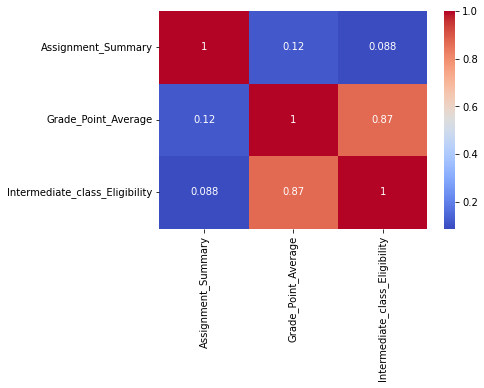

In [136]:
# correlation heatmap of the data set
sb.heatmap(df.corr() , cmap = "coolwarm", annot=True)

array([[<AxesSubplot:title={'center':'Assignment_Summary'}>,
        <AxesSubplot:title={'center':'Grade_Point_Average'}>],
       [<AxesSubplot:title={'center':'Intermediate_class_Eligibility'}>,
        <AxesSubplot:>]], dtype=object)

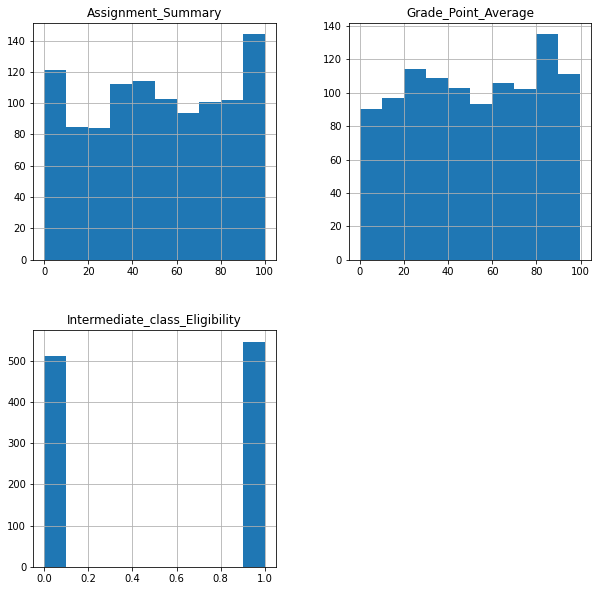

In [137]:
# Checking for skewness in the data
df.hist(figsize=(10,10))

In [138]:
numerical_cols = list(df.select_dtypes('number').columns)

#### Remove target variable from the DataFrame

In [139]:
eligibility_label = df["Intermediate_class_Eligibility"]
raw_df = df.copy()
df.drop("Intermediate_class_Eligibility" , axis = 1 , inplace = True)

In [140]:
numerical_cols.remove('Intermediate_class_Eligibility')

### Data Preprocessing

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [142]:
 # Standardizing the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [143]:
df.head()

,Assignment_Summary,Grade_Point_Average
0,-0.895719,0.749950
1,0.459805,0.937120
2,0.658174,-0.650355
3,-1.457765,0.025535
4,-0.003057,-0.449321


### Spliting Data into Training and Testing

In [144]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df, eligibility_label, test_size=.2, random_state=True)

In [146]:
X_test.shape

(212, 2)

### Model training on the data set

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [148]:
# creating an instance of each models
model_1 = LogisticRegression()
#model_1.fit(X_train, y_train)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()

In [149]:
# Model evaluation function
def eval(Model):
    Model = Model.fit(X_train , y_train)
    Model_predict_train = Model.predict(X_train)
    Model_predict_test = Model.predict(X_test)
    
    accuracy_score_train = accuracy_score(Model_predict_train , y_train)
    accuracy_score_test = accuracy_score(Model_predict_test , y_test)
    
    print (f"The model has an accuracy score of {accuracy_score_train} on training and {accuracy_score_test} on testing.")

In [150]:
eval(model_1)

The model has an accuracy score of 0.9964622641509434 on training and 1.0 on testing.


In [151]:
eval(model_2)

The model has an accuracy score of 1.0 on training and 1.0 on testing.


In [152]:
eval(model_3)

The model has an accuracy score of 1.0 on training and 1.0 on testing.


The models are all doing well. However, valuation still needs to be done.

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [155]:
cross_val_score(model_1 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([1.        , 0.98939929, 1.        ])

In [156]:
cross_val_score(model_2 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([1.        , 0.99646643, 1.        ])

In [157]:
cross_val_score(model_3 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([1.        , 0.99646643, 1.        ])

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
y_predict = model_1.predict(X_test)
print(classification_report(y_test, y_predict)) #print classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       103

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



Our accuracy is 100%

In [160]:
confusion_matrix(y_test, y_predict)

array([[109,   0],
       [  0, 103]], dtype=int64)